In [2]:
# Download the dataset from kaggle (if needed)
import os 
need_download: bool = not os.path.exists("bank-note-authentication/BankNote_Authentication.csv")

if need_download:
    !kaggle datasets download ritesaluja/bank-note-authentication-uci-data
    !unzip bank-note-authentication-uci-data.zip -d bank-note-authentication

# Import needed libraries
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt

# from matplotlib.colors import ListedColormap
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression

from outlier_generation import generate_artificial_outliers

In [3]:
# Import the data into a pandas frame
raw_df = pd.read_csv("bank-note-authentication/BankNote_Authentication.csv")

# Process by 
# 1. replacing "?" with Na
# 2. replacing certain columns as category types
processed_df = raw_df.copy()
processed_df.replace("?", pd.NA, inplace=True)


# print(processed_df.dtypes)

# Filter out incomplete rows
complete_df = processed_df.dropna()
print(f"# complete entries = {len(complete_df)}, # incomplete entries = {len(raw_df) - len(complete_df)}")

# Split
X = complete_df.iloc[:, :-1]
y = complete_df.iloc[:, -1]

# complete entries = 1372, # incomplete entries = 0


# Test logistic regression fit

In [4]:
clf = LogisticRegression(random_state=0).fit(X, y)
print(f"Logistic regression score = {clf.score(X, y)}")

Logistic regression score = 0.9897959183673469


# Plot each pair of two features

In [5]:
from itertools import combinations

def plot_pairwise_features(X, y):
    """
    Plots pairwise combinations of features from a DataFrame.

    Parameters:
        X_df (pd.DataFrame): A DataFrame of features
        y_df (pd.DataFrame): A DataFrame of labels

    Returns:
        fig (matplotlib.figure.Figure): The figure containing the subplots.
    """    
    colors = {0: 'blue', 1: 'orange'}
    labels = {0: 'Class 0', 1: 'Class 1'}

    # Get all unique pairs of column indices
    feature_pairs = list(combinations(X.columns, 2))

    # Create a 2 x ceil(k/2) grid for the subplots
    fig, axes = plt.subplots(2, math.ceil(len(feature_pairs) / 2), figsize=(15, 10))
    fig.suptitle("Pairwise Feature Plots", fontsize=16)
    
    # Plot each pair on a subplot
    for ax, (feat1, feat2) in zip(axes.flatten(), feature_pairs):
        for label in [0, 1]:
            mask = (y == label)
            ax.scatter(X[feat1][mask], X[feat2][mask], alpha=0.7, color=colors[label], edgecolor='black')
        ax.set_xlabel(feat1)
        ax.set_ylabel(feat2)
        ax.set_title(f"{feat1} vs {feat2}")

    # Adjust layout for better spacing
    fig.tight_layout(rect=[0, 0.03, 1, 0.95])  # rect adjusts space for the main title

    # Add a legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=colors[label], markersize=8, label=labels[label])
               for label in labels]
    fig.legend(handles=handles, loc='lower right', title="Classes", bbox_to_anchor=(1.0, 0.9))

    return fig

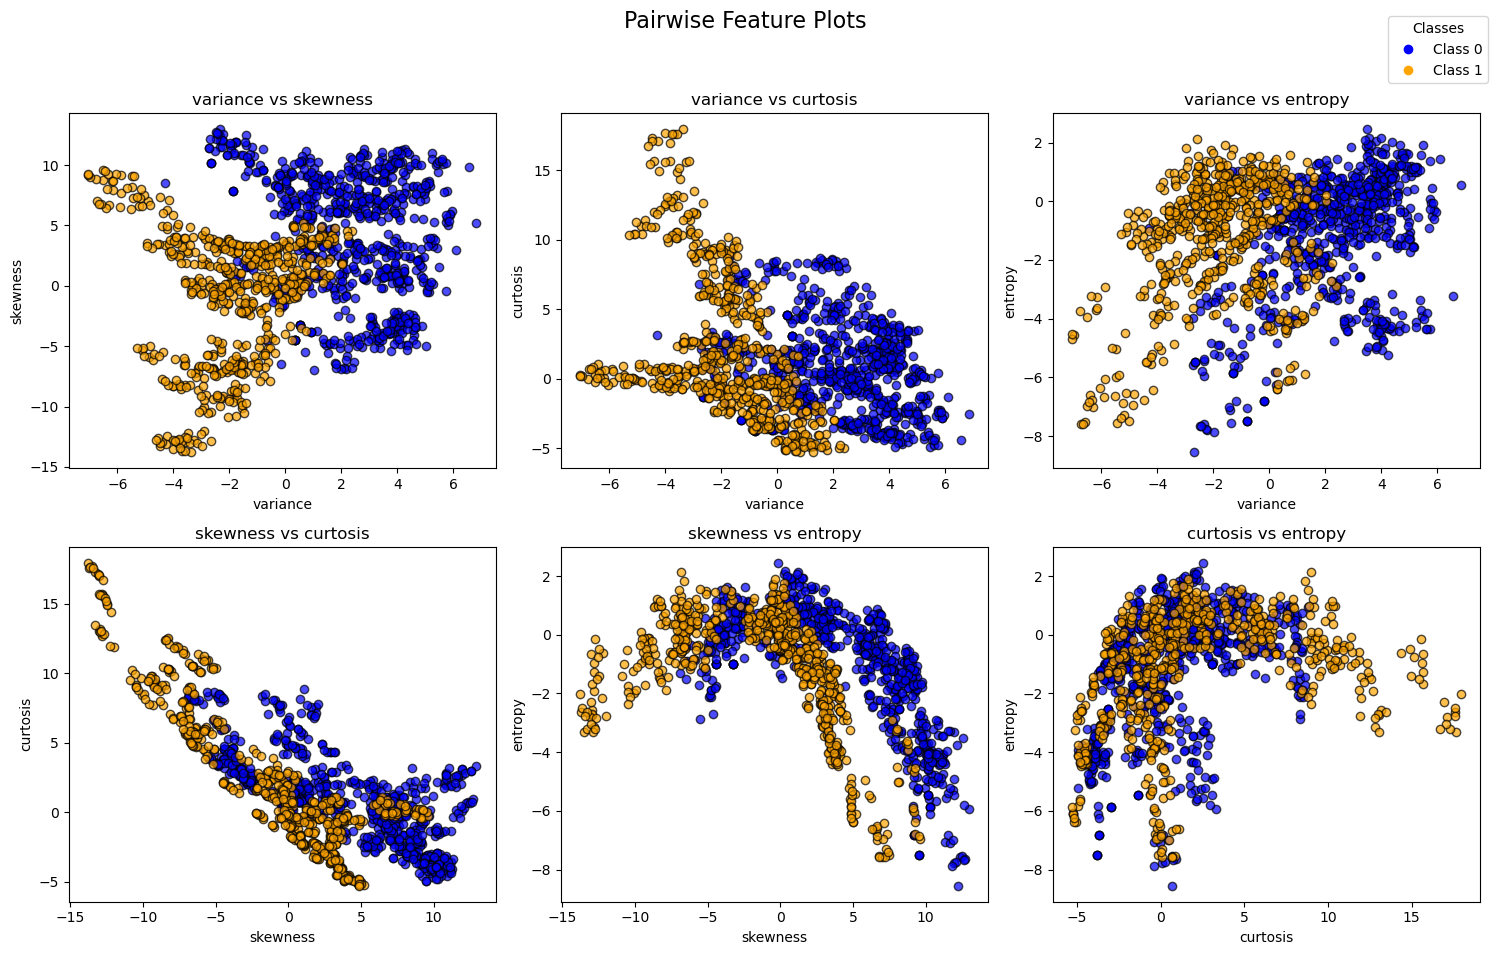

In [6]:
plot_pairwise_features(X, y)
pass

# Plot original data in 2D using PCA

In [7]:
# Return a figure with two classes in 2D PCA
def plot_2D_PCA(X_df, y_df):
    # Project onto 2D using PCA
    pca = PCA(n_components = 2)
    X_pca = pca.fit_transform(X_df)

    # Convert the PCA result to a DataFrame for easy plotting
    pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
    pca_df['label'] = y_df

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 7))

    for label in pca_df['label'].unique():
        subset = pca_df[pca_df['label'] == label]
        ax.scatter(subset['PC1'], subset['PC2'], label=f'Class {label}', alpha=0.7, edgecolors="black")

    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_title('PCA of Feature Data')
    fig.legend()
    
    return fig

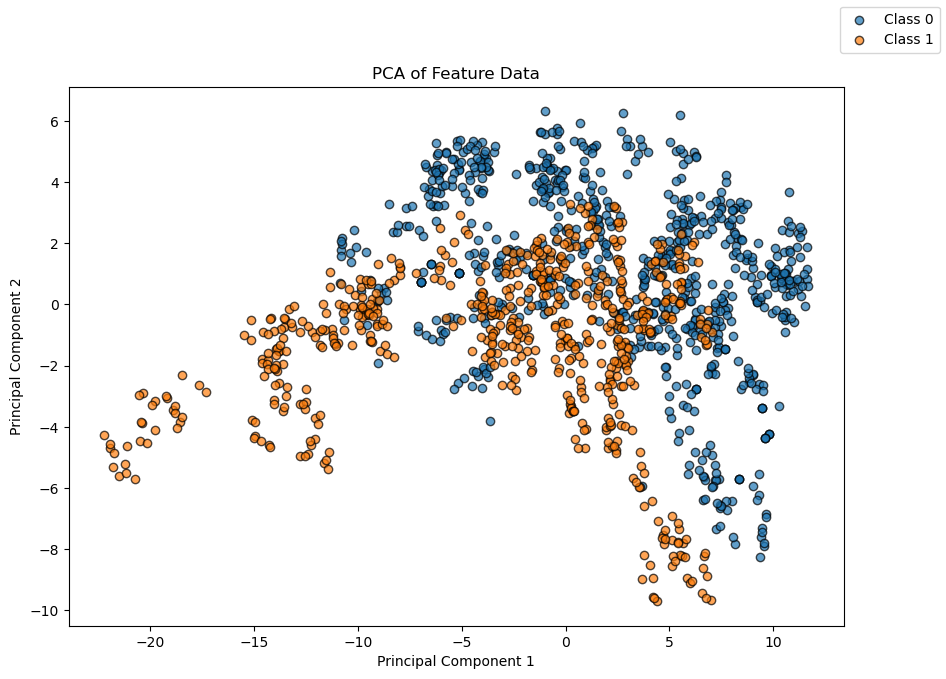

In [8]:
plot_2D_PCA(X, y)
pass

# Generate outliers